In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
import pandas_profiling
import pickle
%matplotlib inline
import plotly.offline as py

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dataframe= pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/database_IND.csv')

In [ ]:
dataframe.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We Can See that there are So Many **Null** values In the dataset.

In [ ]:
dataframe.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [ ]:
print("Value counts for each term: \n",dataframe['other_fuel1'].value_counts())

Value counts for each term: 
 Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


In [ ]:
print("Value counts for each term: \n",dataframe['source'].value_counts())

Value counts for each term: 
 Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Gupta Ltd gepl)                                1
National Ltd nfl)                              1
S Limited Rsolar                               1
Clean Energy edOjects.Com                      1
Chettinad Corp ltd                             1
Name: source, Length: 191, dtype: int64


In [ ]:
print("Value counts for each term: \n",dataframe['generation_data_source'].value_counts())

Value counts for each term: 
 Central Electricity Authority    450
Name: generation_data_source, dtype: int64


In [ ]:
print("Value counts for each term: \n",dataframe['geolocation_source'].value_counts())

Value counts for each term: 
 WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


In [ ]:
dataframe=dataframe.drop(['country','country_long','name','gppd_idnr','url','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_data_source'],axis=1)
dataframe=dataframe.drop(['other_fuel1','owner'],axis=1)

I am droping these Columns Because they Contain Lots Of Null Values or the data that is not needed because it will make our model complex which will eventualy Decrase the Accuracy of Model

In [ ]:
dataframe.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               862 non-null    float64
 2   longitude              862 non-null    float64
 3   primary_fuel           908 non-null    object 
 4   commissioning_year     528 non-null    float64
 5   source                 908 non-null    object 
 6   geolocation_source     889 non-null    object 
 7   year_of_capacity_data  520 non-null    float64
 8   generation_gwh_2013    384 non-null    float64
 9   generation_gwh_2014    401 non-null    float64
 10  generation_gwh_2015    425 non-null    float64
 11  generation_gwh_2016    437 non-null    float64
 12  generation_gwh_2017    443 non-null    float64
dtypes: float64(10), object(3)
memory usage: 92.3+ KB


In [ ]:
dataframe['latitude']=dataframe['latitude'].fillna(dataframe['latitude'].mean())
dataframe['longitude']=dataframe['longitude'].fillna(dataframe['latitude'].mean())
dataframe['commissioning_year']=dataframe['commissioning_year'].fillna(dataframe['commissioning_year'].mean())
dataframe['year_of_capacity_data']=dataframe['year_of_capacity_data'].fillna(dataframe['year_of_capacity_data'].mean())
dataframe['generation_gwh_2013']=dataframe['generation_gwh_2013'].fillna(0)
dataframe['generation_gwh_2014']=dataframe['generation_gwh_2014'].fillna(0)
dataframe['generation_gwh_2015']=dataframe['generation_gwh_2015'].fillna(0)
dataframe['generation_gwh_2016']=dataframe['generation_gwh_2016'].fillna(0)
dataframe['generation_gwh_2017']=dataframe['generation_gwh_2017'].fillna(0)
dataframe['primary_fuel']=dataframe['primary_fuel'].fillna(method='pad')
dataframe['source']=dataframe['source'].fillna(method='pad')
dataframe['geolocation_source']=dataframe['geolocation_source'].fillna(method='pad')

Filing the Missing Data with Mean Of column and its privous Value

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    object 
 4   commissioning_year     908 non-null    float64
 5   source                 908 non-null    object 
 6   geolocation_source     908 non-null    object 
 7   year_of_capacity_data  908 non-null    float64
 8   generation_gwh_2013    908 non-null    float64
 9   generation_gwh_2014    908 non-null    float64
 10  generation_gwh_2015    908 non-null    float64
 11  generation_gwh_2016    908 non-null    float64
 12  generation_gwh_2017    908 non-null    float64
dtypes: float64(10), object(3)
memory usage: 92.3+ KB


In [ ]:
dataframe.primary_fuel= pd.factorize(dataframe.primary_fuel)[0]
dataframe.source= pd.factorize(dataframe.source)[0]
dataframe.geolocation_source= pd.factorize(dataframe.geolocation_source)[0]

Converting Labels to Int Values

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   capacity_mw            908 non-null    float64
 1   latitude               908 non-null    float64
 2   longitude              908 non-null    float64
 3   primary_fuel           908 non-null    int64  
 4   commissioning_year     908 non-null    float64
 5   source                 908 non-null    int64  
 6   geolocation_source     908 non-null    int64  
 7   year_of_capacity_data  908 non-null    float64
 8   generation_gwh_2013    908 non-null    float64
 9   generation_gwh_2014    908 non-null    float64
 10  generation_gwh_2015    908 non-null    float64
 11  generation_gwh_2016    908 non-null    float64
 12  generation_gwh_2017    908 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 92.3 KB


In [ ]:
dataframe.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,0,2011.000000,0,0,2018.0,0.000000,0.000000,0.000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,1996.876894,1,1,2018.0,0.000000,0.000000,0.000,0.000000,0.000000
2,39.2,21.9038,69.3732,2,1996.876894,2,1,2018.0,0.000000,0.000000,0.000,0.000000,0.000000
3,135.0,23.8712,91.3602,3,2004.000000,3,1,2018.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.000000,3,1,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [ ]:
print("Value counts for each term: \n",dataframe['primary_fuel'].value_counts())
print("Value counts for each term: \n",dataframe['source'].value_counts())
print("Value counts for each term: \n",dataframe['geolocation_source'].value_counts())

Value counts for each term: 
 1    259
4    250
0    127
2    123
3     69
5     50
6     21
7      9
Name: primary_fuel, dtype: int64
Value counts for each term: 
 3      520
2      124
10      10
0        8
57       6
      ... 
122      1
120      1
119      1
118      1
95       1
Name: source, Length: 191, dtype: int64
Value counts for each term: 
 1    781
2    123
0      4
Name: geolocation_source, dtype: int64


In [ ]:
y=dataframe['capacity_mw']
X=dataframe[['latitude','longitude','primary_fuel','commissioning_year','source','geolocation_source','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

Creating label and Training Data.

In [ ]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=r_s)
  for i in model:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc= r2_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.9135721128003993   For Random State  81  and model is  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


After Implementing All the Modles We found out that  KNeighborsRegressor() Works well On our data Because it has Highest Accuray

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=81)

In [ ]:
best_model=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
best_model.fit(X_train,y_train)
pre=best_model.predict(X_test)
r2_sc= r2_score(y_test,pre)


In [ ]:
print("Accuray Of Model Is  ;>",r2_sc)

Accuray Of Model Is  ;> 0.9135721128003993


In [ ]:
filename = "Best_Power_Reg.pkl"
pickle.dump(best_model, open(filename, 'wb'))

Saving models

In [ ]:
y=dataframe['primary_fuel']
X=dataframe[['latitude','longitude','capacity_mw','commissioning_year','source','geolocation_source','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

Making Data For Classification

In [ ]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(), SVC(kernel='rbf'),AdaBoostClassifier(),GradientBoostingClassifier()]
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=r_s)
  for i in model:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc=accuracy_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.9230769230769231   For Random State  54  and model is  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


**GradientBoostingClassifier() **Is the Best Model On our Data Because of its Accuray

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=54)
best_classifier=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
best_classifier.fit(X_train,y_train)
pred=best_classifier.predict(X_test)
Scor= accuracy_score(y_test,pred)
print(Scor)

0.9230769230769231


In [ ]:
filename = "Best_Power_Classifier.pkl"
pickle.dump(best_classifier, open(filename, 'wb'))

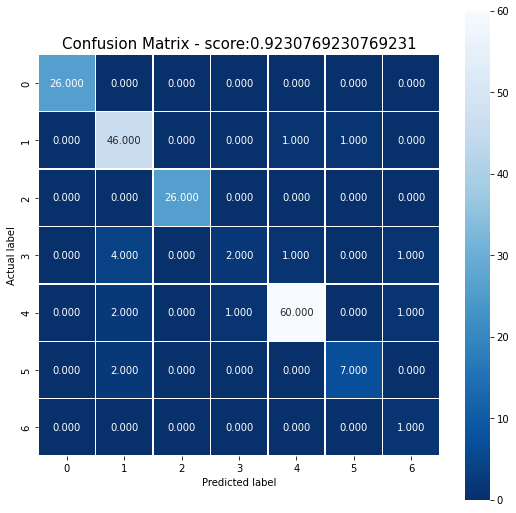

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.85      0.96      0.90        48
           2       1.00      1.00      1.00        26
           3       0.67      0.25      0.36         8
           4       0.97      0.94      0.95        64
           5       0.88      0.78      0.82         9
           6       0.33      1.00      0.50         1

    accuracy                           0.92       182
   macro avg       0.81      0.85      0.79       182
weighted avg       0.93      0.92      0.92       182



In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,pred))